In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('6_Farklı_Duygu.csv')

In [3]:
df.tail()

,ID,Entry,OriginalEmotion
27345,34393,İnternet kotasının bitmesinden.,Fear
27346,34394,Biri bana bir işi nasıl yapmam gerektiğini söy...,Anger
27347,34395,Park halindeki arabama çarptıklarında.,Sadness
27348,34396,Bardağımı başkasının kullanması.,Disgust
27349,34397,Beklemediğim şeylerle karşılaşmak.,Surprise


In [4]:
del df['ID']

In [5]:

# kategorileri integer değerlere map ediyoruz, sınıflandırmanın yapılabilmesi için
df["category_id"] = df.OriginalEmotion.map({'Happy':0,'Disgust':1,'Surprise':2,'Fear':3,'Anger':4,'Sadness':5})
df.head(28)

,Entry,OriginalEmotion,category_id
0,her yeni gün bir mutluluk,Happy,0
1,gece kimsenin olmadığı sokaklardan geçerken ço...,Fear,3
2,gerçekleşemeyen hayaller,Anger,4
3,arkadaş kaybetmek beni üzüyor,Sadness,5
4,insanların çıkarcı olmalarından tiksiniyorum,Disgust,1
5,hiç beklemediğim anda sürprizle karşılaşmak be...,Surprise,2
6,Ailemle tatile çıktığımda çok sevindim.,Happy,0
7,Rüyamda babamın öldüğünü gördüğümde çok korkmu...,Fear,3
8,Daha taksiti bitmemiş bilgisayarımı ben uyurke...,Anger,4
9,Annemin üzüldüğünü gördüğümde üzülüyorum.,Sadness,5


In [9]:
# stopwordleri çıkarıyoruz
with open('stopwords-tr.txt', 'r') as f:
    myList = [line.strip() for line in f]

In [7]:
df.Entry

0                                her yeni gün bir mutluluk
1        gece kimsenin olmadığı sokaklardan geçerken ço...
2                                 gerçekleşemeyen hayaller
3                            arkadaş kaybetmek beni üzüyor
4             insanların çıkarcı olmalarından tiksiniyorum
                               ...                        
27345                      İnternet kotasının bitmesinden.
27346    Biri bana bir işi nasıl yapmam gerektiğini söy...
27347               Park halindeki arabama çarptıklarında.
27348                     Bardağımı başkasının kullanması.
27349                   Beklemediğim şeylerle karşılaşmak.
Name: Entry, Length: 27350, dtype: object

In [10]:
# cümleleri vektörize ediyoruz 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=myList)

features = tfidf.fit_transform(df.Entry).toarray()
labels = df.OriginalEmotion
features.shape

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abuk', 'abukã', 'adamakä', 'altmä', 'altä', 'artä', 'aslä', 'asä', 'ayrä', 'aã', 'bazä', 'baåÿkasä', 'beåÿ', 'bilcã¼mle', 'birkaã', 'birã', 'biråÿey', 'biråÿeyi', 'boåÿuna', 'bunlarä', 'buracä', 'burasä', 'bã', 'bã¼r', 'bã¼rkã¼', 'bã¼rã¼', 'bã¼sbã¼tã¼n', 'bã¼tã¼n', 'ca', 'cã¼mlesi', 'deäÿil', 'deäÿin', 'diäÿer', 'diäÿeri', 'diäÿerleri', 'dolayä', 'doäÿru', 'dã', 'ende', 'enlerde', 'esnasä', 'etraflä', 'ettiäÿi', 'ettiäÿini', 'eäÿer', 'eåÿitli', 'gayrä', 'gereäÿi', 'gerã', 'geã', 'gã', 'gä', 'halihazä', 'hariã', 'hasä', 'henã¼z', 'hiã', 'hoåÿ', 'in', 'inde', 'itibarä', 'iã', 'iåÿ', 'iåÿte', 'kanä', 'karåÿä', 'kaã', 'kelam', 'keåÿke', 'klarä', 'kta', 'kã', 'kã¼lliyen', 'kä', 'larä', 'llä', 'lmasä', 'lsa', 'lã¼tfen', 'lä', 'mca', 'meäÿer', 'meäÿerki', 'meä

(27350, 5882)

In [11]:
pip install io

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

# unigram ve bigramları çıkarıyoruz
from io import StringIO
category_id_df = df[['OriginalEmotion', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'OriginalEmotion']].values)


from sklearn.feature_selection import chi2
import numpy as np

N = 10
for OriginalEmotion, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(OriginalEmotion))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Anger':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman


C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Disgust':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman


C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Fear':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman


C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Happy':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman


C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Sadness':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman
# 'Surprise':
  . Most correlated unigrams:
       . grup
       . golü
       . gol
       . gizli
       . gittiğini
       . gittiğinde
       . gittiğimizde
       . gittiğimiz
       . gittiğimde
       . şımarık
  . Most correlated bigrams:
       . gitmek zorunda
       . gitmek için
       . gol attığı
       . gol atması
       . gittiğimiz zaman
       . gittiğimde çok
       . gittiğimde mutlu
       . gittiğim zamanlar
       . gittiğim zaman
       . gittiği zaman


C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# 4 farklı model deniyoruz, en yüksek accuracyi LinearSVC ile alıyoruz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [14]:
cv_df.groupby('model_name').accuracy.mean()
     

model_name
LinearSVC                 0.787934
LogisticRegression        0.793492
MultinomialNB             0.784205
RandomForestClassifier    0.603766
Name: accuracy, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




# accuracy
accuracy_score(y_test, y_pred)

0.7992687385740402

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model2 =  LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.10, random_state=0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# accuracy
accuracy_score(y_test, y_pred)

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8029250457038392

In [26]:
# test cümleleri oluşturuyoruz
texts = ["kibirli olacağım bir anda ölçüt olarak kullanmamın icap edeceği bir listeyi oluşturacak muhteşem insanlardır.",
         "3-0 kadıköyde yendik. sevinçten ağlıyorum. çok mutluyum",
         "bu nasıl mümkün olabilir? 6-0 yenilmişiz",
         "",
         "olası bu deprem ne ilahi bir olay olarak ne de jeolojik bir olay olarak açıklanabilir. bu deprem toplumsal sistemin ürünüdür. yıkım ve ölüm yoksul insanların başına çökecektir."]
text_features = tfidf.transform(texts)
predictions = model2.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(predicted))
  print("")

"kibirli olacağım bir anda ölçüt olarak kullanmamın icap edeceği bir listeyi oluşturacak muhteşem insanlardır."
  - Predicted as: 'Fear'

"3-0 kadıköyde yendik. sevinçten ağlıyorum. çok mutluyum"
  - Predicted as: 'Happy'

"Bu nasıl mümkün olabilir? 6-0 yenilmişiz"
  - Predicted as: 'Surprise'

"ya topun geliş yönüne paralel yatıyor beyinsiz, bin tane böyle gol yedi. topun geliş yönünü kesecek şekilde topa yatsa yediklerinin yarısını kurtaracak."
  - Predicted as: 'Surprise'

"olası bu deprem ne ilahi bir olay olarak ne de jeolojik bir olay olarak açıklanabilir. bu deprem toplumsal sistemin ürünüdür. yıkım ve ölüm yoksul insanların başına çökecektir."
  - Predicted as: 'Fear'



In [75]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import csv
import pandas as pd

In [95]:
URL = input()

entries = []

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36 OPR/77.0.4054.277"

r = requests.get(URL, headers={'User-Agent': USER_AGENT})
soup = BeautifulSoup(r.content, 'html.parser')

def page_counts(url):
    """
        Get page counts of the titles
    """
    r = requests.get(url, headers={'User-Agent':USER_AGENT})
    soup = BeautifulSoup(r.content, 'html.parser')
    try:
        last_page = soup.find('div', {'class':'pager'})['data-pagecount']
    except TypeError:
        last_page = 1
    return int(last_page)

page_count = page_counts(URL)

start = datetime.datetime.now()
rootURL = URL[:-1]
for i in range(int(page_count) + 1):   ##pagecount
    
    URL_ = rootURL + str(i)
    r = requests.get(URL_, headers={'User-Agent': USER_AGENT})
    soup2 = BeautifulSoup(r.text, 'html.parser')
    entry = soup2.find('div', {'class':'content'}) # find entry content
    entry_date = soup2.find('a', {'class':'entry-date permalink'}) # find date of the entry
    while entry is not None: # iterate until entry object not None 
        data = {
            'Entry': entry.get_text(separator=" ").replace('\n','').replace('\r', '').replace('\t', '').replace('    ', '').replace('bkz: ', '').replace('---  spoiler  ---', ''),# clear the contents of the entry from unnecessary things
            'Date': entry_date.text[:10],
        }
        entries.append(data)
        entry = entry.find_next('div', {'class':'content'}) # find next entry content
        entry_date = entry_date.find_next('a', {'class':'entry-date permalink'}) # find next date of the entry
        
end = datetime.datetime.now()
end-start

https://eksisozluk.com/aldatmak--44230?p=1


datetime.timedelta(seconds=64, microseconds=764516)

In [96]:
entriesdf = pd.DataFrame.from_dict(entries)
entriesdf

,Entry,Date
0,kandirmak,27.02.2000
1,en kotusudur gonul calmak,04.07.2000
2,ikili ilişkilerde düşünecek olursak iki hallid...,10.09.2001
3,aldatmak fiziksel ve beyinsel olarak iki şekil...,24.11.2001
4,"seytan in yaptigi istir, aldatanlar bir gün k...",10.12.2001
...,...,...
1279,şu dönemde yapmayanı dövüyorlar,25.12.2022
1280,bazen aklımdan geçmiyor değil ama sonra dur di...,25.12.2022
1281,yanlış bir davranıştır.,26.12.2022
1282,ucuzluktur. kendi değerinizi ortaya koyarsınız...,26.12.2022


In [98]:
entries = entriesdf['Entry'].to_list()

In [99]:
text_features = tfidf.transform(entries)
predictions = model2.predict(text_features)
for text, predicted in zip(entries, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(predicted))
  print("")

"kandirmak  "
  - Predicted as: 'Anger'

"en kotusudur  gonul calmak "
  - Predicted as: 'Anger'

"ikili ilişkilerde düşünecek olursak iki hallidir.fiziksel ve ruhsal..birincisi erkeklerde çok görülür.ikincisi ise kadınlarda.. (ve maalesef ikinci şık daha berbattır)  "
  - Predicted as: 'Surprise'

"aldatmak fiziksel ve beyinsel olarak iki şekilde gerçekleşir. her ne kadar ikisi de aşşalıkça da olsa beyinsel aldatmanın bahanesi yoktur olamaz ve bu sebepten ötürü beyinsel aldatma aldatmaların en aşşalıkça olanıdır. alkollüsündür, tatmin edilememektesindir *  falan filan... fiziksel aldatma bu sebeplerden ötürü gerçekleşir. haklı veya haksız  nedenleri  mevcuttur. oysa beyinsel aldatmada sebep aldatanın tamamen aşşalık bi yaratık olmasından kaynaklanmaktadır. affedilemezdir. bi insana olan sevgi bittiyse, fakat zamanında gerçek bir sevgi ise bu, o kişiye saygı beslenmiş olmalıdır, sevgi bittiği an bu durumdan haberdar edilmelidir kişi, aksi durum mide bulandırıcı ve iğrençtir çünkü.  "
 

In [100]:
predictions

array(['Anger', 'Anger', 'Surprise', ..., 'Anger', 'Sadness', 'Happy'],
      dtype=object)

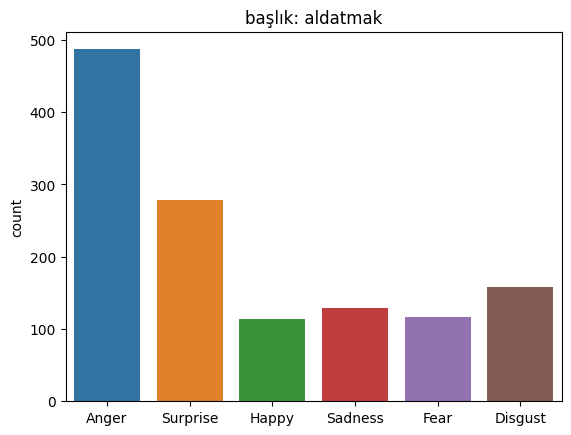

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=predictions).set(title = "başlık: aldatmak")
plt.savefig('aldatmak.png')

In [102]:
#modelimizi kaydediyoruz
import pickle
filename = 'emotion_model.pickle'
pickle.dump(model, open(filename, 'wb'))